In [2]:
import os
import sys
sys.path.insert(0,'../')
from libs.ssl_dataloader import *
from libs.ssl_model import *
from libs.ssl_utils import *
from libs.eeg_utils import *
from braindecode.preprocessing import (
    preprocess, Preprocessor, create_fixed_length_windows)
from braindecode.datasets import BaseDataset, BaseConcatDataset, WindowsDataset
from braindecode.preprocessing.windowers import EEGWindowsDataset
from braindecode.datautil import load_concat_dataset
%load_ext autoreload
%autoreload 2
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

In [3]:
random_state = 87
n_jobs = -1

In [4]:
datasets = []
releases = list(range(9,0,-1))
hbn_datasets = ['ds005514','ds005512','ds005511','ds005510','ds005509','ds005508','ds005507','ds005506','ds005505']
hbn_release_ds = dict(zip(releases,hbn_datasets))

In [5]:
hbn_release_ds

{9: 'ds005514',
 8: 'ds005512',
 7: 'ds005511',
 6: 'ds005510',
 5: 'ds005509',
 4: 'ds005508',
 3: 'ds005507',
 2: 'ds005506',
 1: 'ds005505'}

In [34]:
ds1 = HBNDataset(hbn_release_ds[1], tasks=['RestingState'], num_workers=n_jobs)
ds2 = HBNDataset(hbn_release_ds[6], tasks=['RestingState'], num_workers=n_jobs)

Reading /mnt/nemar/openneuro/ds005505/sub-NDARLV387GP4/eeg/sub-NDARLV387GP4_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARPL306LC6/eeg/sub-NDARPL306LC6_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARUW904FMQ/eeg/sub-NDARUW904FMQ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARZC499NVX/eeg/sub-NDARZC499NVX_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARCJ594BWQ/eeg/sub-NDARCJ594BWQ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARDL511UND/eeg/sub-NDARDL511UND_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARBK082PDD/eeg/sub-NDARBK082PDD_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARPC817XZ5/eeg/sub-NDARPC817XZ5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARYD546HCB/eeg/sub-NDARYD546HCB_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARCE721YB5/eeg/sub-NDARCE721YB5_task-R

/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005505/sub-NDARCJ475WJP/eeg/sub-NDARCJ475WJP_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARUT607MWK/eeg/sub-NDARUT607MWK_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARZH761YA7/eeg/sub-NDARZH761YA7_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARZV608BL8/eeg/sub-NDARZV608BL8_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARRL660CME/eeg/sub-NDARRL660CME_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARUN300FG1/eeg/sub-NDARUN300FG1_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARXR965TFK/eeg/sub-NDARXR965TFK_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARJU805JG5/eeg/sub-NDARJU805JG5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARDV088AA3/eeg/sub-NDARDV088AA3_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARUN221VCJ/eeg/sub-NDARUN221VCJ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARVB297WUM/eeg/sub-NDARVB297WUM_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARCJ170CT9/eeg/sub-NDARCJ170CT9_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARGB441VVD/eeg/sub-NDARGB441VVD_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARCR499NE4/eeg/sub-NDARCR499NE4_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARUX216VHK/eeg/sub-NDARUX216VHK_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARVX337AC0/eeg/sub-NDARVX337AC0_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARYT885XH3/eeg/sub-NDARYT885XH3_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARTF133LLM/eeg/sub-NDARTF133LLM_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARAC904DMU/eeg/sub-NDARAC904DMU_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARWX338NDL/eeg/sub-NDARWX338NDL_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARAP359UM6/eeg/sub-NDARAP359UM6_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARRM467NP2/eeg/sub-NDARRM467NP2_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARNR773DL4/eeg/sub-NDARNR773DL4_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARWW003WWW/eeg/sub-NDARWW003WWW_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARBD879MBX/eeg/sub-NDARBD879MBX_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARMR491LM5/eeg/sub-NDARMR491LM5_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARGR106TJB/eeg/sub-NDARGR106TJB_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDAREG561ML5/eeg/sub-NDAREG561ML5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARAM704GKZ/eeg/sub-NDARAM704GKZ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARLH979WFX/eeg/sub-NDARLH979WFX_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARTP313AGH/eeg/sub-NDARTP313AGH_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005505/sub-NDARKA627LF8/eeg/sub-NDARKA627LF8_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARFW972KFQ/eeg/sub-NDARFW972KFQ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDAREN519BLJ/eeg/sub-NDAREN519BLJ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARLL720BGU/eeg/sub-NDARLL720BGU_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARWA622HHZ/eeg/sub-NDARWA622HHZ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARGD507TDZ/eeg/sub-NDARGD507TDZ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARTX934NH6/eeg/sub-NDARTX934NH6_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARFD316UD2/eeg/sub-NDARFD316UD2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARNW687HMZ/eeg/sub-NDARNW687HMZ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARZX561DR9/eeg/sub-NDARZX561DR9_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARXY162ERA/eeg/sub-NDARXY162ERA_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARGB040MGR/eeg/sub-NDARGB040MGR_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARJM828PAL/eeg/sub-NDARJM828PAL_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARTD468TUH/eeg/sub-NDARTD468TUH_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARZJ016GL0/eeg/sub-NDARZJ016GL0_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARBX121UM9/eeg/sub-NDARBX121UM9_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARTX659HAF/eeg/sub-NDARTX659HAF_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARKM635UY0/eeg/sub-NDARKM635UY0_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARWV405ZW0/eeg/sub-NDARWV405ZW0_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARPN418ZKT/eeg/sub-NDARPN418ZKT_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARKD134TCX/eeg/sub-NDARKD134TCX_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARAG143ARJ/eeg/sub-NDARAG143ARJ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARCN669XPR/eeg/sub-NDARCN669XPR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARYL758JGG/eeg/sub-NDARYL758JGG_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARCW071AU5/eeg/sub-NDARCW071AU5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARRP818DWL/eeg/sub-NDARRP818DWL_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARGL800LDW/eeg/sub-NDARGL800LDW_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARWW005GCU/eeg/sub-NDARWW005GCU_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARXG469XGP/eeg/sub-NDARXG469XGP_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARXU253JHC/eeg/sub-NDARXU253JHC_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARAN385MDH/eeg/sub-NDARAN385MDH_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARJY033DKZ/eeg/sub-NDARJY033DKZ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005505/sub-NDARLY585ZVN/eeg/sub-NDARLY585ZVN_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARMU053YEU/eeg/sub-NDARMU053YEU_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARVU683CTN/eeg/sub-NDARVU683CTN_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARPX219TW0/eeg/sub-NDARPX219TW0_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARND085WZK/eeg/sub-NDARND085WZK_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARUL224GN6/eeg/sub-NDARUL224GN6_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARNE758RD6/eeg/sub-NDARNE758RD6_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARWR732NZE/eeg/sub-NDARWR732NZE_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARZP630WYL/eeg/sub-NDARZP630WYL_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARXF203DCD/eeg/sub-NDARXF203DCD_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARGU729WUR/eeg/sub-NDARGU729WUR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARTN158LRF/eeg/sub-NDARTN158LRF_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARCW094JCG/eeg/sub-NDARCW094JCG_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARET550NXC/eeg/sub-NDARET550NXC_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARDC704GKW/eeg/sub-NDARDC704GKW_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARVL555VVA/eeg/sub-NDARVL555VVA_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARZN277NR6/eeg/sub-NDARZN277NR6_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARWA513WM2/eeg/sub-NDARWA513WM2_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARET332CTB/eeg/sub-NDARET332CTB_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARTE785ZMJ/eeg/sub-NDARTE785ZMJ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARGJ395FKP/eeg/sub-NDARGJ395FKP_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARWZ495PG4/eeg/sub-NDARWZ495PG4_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARHY177LY9/eeg/sub-NDARHY177LY9_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARXG736VP9/eeg/sub-NDARXG736VP9_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARYY218LU2/eeg/sub-NDARYY218LU2_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005505/sub-NDARRF897HB5/eeg/sub-NDARRF897HB5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARGX001CB1/eeg/sub-NDARGX001CB1_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARHR443EHF/eeg/sub-NDARHR443EHF_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARKU278YRR/eeg/sub-NDARKU278YRR_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARBH024NH2/eeg/sub-NDARBH024NH2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDAREM731BYM/eeg/sub-NDAREM731BYM_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARXD388TTE/eeg/sub-NDARXD388TTE_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARTJ032FJ2/eeg/sub-NDARTJ032FJ2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARRH407MEY/eeg/sub-NDARRH407MEY_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARDU986RBM/eeg/sub-NDARDU986RBM_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARXT792GY8/eeg/sub-NDARXT792GY8_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005505/sub-NDARDH670PXH/eeg/sub-NDARDH670PXH_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARNZ615UEU/eeg/sub-NDARNZ615UEU_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005505/sub-NDARPU897CM5/eeg/sub-NDARPU897CM5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARLF616PBU/eeg/sub-NDARLF616PBU_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005505/sub-NDARJZ679KXJ/eeg/sub-NDARJZ679KXJ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005510/sub-NDARAE877NER/eeg/sub-NDARAE877NER_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARKN346XZH/eeg/sub-NDARKN346XZH_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARYW984FLT/eeg/sub-NDARYW984FLT_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARFX710UZA/eeg/sub-NDARFX710UZA_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARAX277ATU/eeg/sub-NDARAX277ATU_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARBM197EFF/eeg/sub-NDARBM197EFF_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARCA578CEB/eeg/sub-NDARCA578CEB_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARWX605LAD/eeg/sub-NDARWX605LAD_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARYA955CY1/eeg/sub-NDARYA955CY1_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARWT694TXM/eeg/sub-NDARWT694TXM_task-R

/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005510/sub-NDARDE827UF0/eeg/sub-NDARDE827UF0_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARFX626DFH/eeg/sub-NDARFX626DFH_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARZC058BA5/eeg/sub-NDARZC058BA5_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARGP399TDM/eeg/sub-NDARGP399TDM_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARRD943ZWU/eeg/sub-NDARRD943ZWU_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARNE729PN2/eeg/sub-NDARNE729PN2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARWN424BPK/eeg/sub-NDARWN424BPK_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARGZ553TMQ/eeg/sub-NDARGZ553TMQ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARUL454XRE/eeg/sub-NDARUL454XRE_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARPM572ZZV/eeg/sub-NDARPM572ZZV_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARLJ168LXY/eeg/sub-NDARLJ168LXY_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARHT774ZK1/eeg/sub-NDARHT774ZK1_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARTN483XE4/eeg/sub-NDARTN483XE4_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARLT314TWP/eeg/sub-NDARLT314TWP_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARLV155RW0/eeg/sub-NDARLV155RW0_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARCN500KJG/eeg/sub-NDARCN500KJG_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARXE542EMB/eeg/sub-NDARXE542EMB_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARAB756JDJ/eeg/sub-NDARAB756JDJ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARGP191YHN/eeg/sub-NDARGP191YHN_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARAB458VK9/eeg/sub-NDARAB458VK9_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARFA780CUG/eeg/sub-NDARFA780CUG_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARAE301XTM/eeg/sub-NDARAE301XTM_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARCR594JN0/eeg/sub-NDARCR594JN0_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARKT952ML4/eeg/sub-NDARKT952ML4_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARTV107XD4/eeg/sub-NDARTV107XD4_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARZR538EZH/eeg/sub-NDARZR538EZH_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARAT680GJA/eeg/sub-NDARAT680GJA_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARNE906EJA/eeg/sub-NDARNE906EJA_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARTT979FDD/eeg/sub-NDARTT979FDD_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARKG697CEW/eeg/sub-NDARKG697CEW_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARDV865ENP/eeg/sub-NDARDV865ENP_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARPG847LB8/eeg/sub-NDARPG847LB8_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005510/sub-NDARWR448MER/eeg/sub-NDARWR448MER_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARAN262WK6/eeg/sub-NDARAN262WK6_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARYL090TGH/eeg/sub-NDARYL090TGH_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARFD552FRH/eeg/sub-NDARFD552FRH_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARGH592NZ2/eeg/sub-NDARGH592NZ2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARMA154FAK/eeg/sub-NDARMA154FAK_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARDZ425JVB/eeg/sub-NDARDZ425JVB_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARCJ011TTG/eeg/sub-NDARCJ011TTG_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARNJ899HW7/eeg/sub-NDARNJ899HW7_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARNK489GNR/eeg/sub-NDARNK489GNR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARKT032RYR/eeg/sub-NDARKT032RYR_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARTY549YDG/eeg/sub-NDARTY549YDG_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARLW312JT8/eeg/sub-NDARLW312JT8_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARTC710UM1/eeg/sub-NDARTC710UM1_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARCH628LKW/eeg/sub-NDARCH628LKW_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARTT383DPY/eeg/sub-NDARTT383DPY_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARRZ606EDP/eeg/sub-NDARRZ606EDP_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARMW088NNR/eeg/sub-NDARMW088NNR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARGE994BMX/eeg/sub-NDARGE994BMX_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARFG118DW3/eeg/sub-NDARFG118DW3_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARWM683XYZ/eeg/sub-NDARWM683XYZ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARUK101YT3/eeg/sub-NDARUK101YT3_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARAB055BPR/eeg/sub-NDARAB055BPR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARVK847ZRT/eeg/sub-NDARVK847ZRT_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARUD306BB0/eeg/sub-NDARUD306BB0_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARWN709HA2/eeg/sub-NDARWN709HA2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARBK106KRH/eeg/sub-NDARBK106KRH_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARZG081LYG/eeg/sub-NDARZG081LYG_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARJG740PM8/eeg/sub-NDARJG740PM8_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARWF086XF8/eeg/sub-NDARWF086XF8_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARZY224TFX/eeg/sub-NDARZY224TFX_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005510/sub-NDARKK597VDH/eeg/sub-NDARKK597VDH_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARTA344CCA/eeg/sub-NDARTA344CCA_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARRY126FA5/eeg/sub-NDARRY126FA5_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARYN474PEK/eeg/sub-NDARYN474PEK_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARLB581AXF/eeg/sub-NDARLB581AXF_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARMA598JTX/eeg/sub-NDARMA598JTX_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARWD911WBU/eeg/sub-NDARWD911WBU_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARYJ301DYN/eeg/sub-NDARYJ301DYN_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARJA830BYV/eeg/sub-NDARJA830BYV_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARVN270UU2/eeg/sub-NDARVN270UU2_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARAY283AU1/eeg/sub-NDARAY283AU1_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARKM250ET5/eeg/sub-NDARKM250ET5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARLY947EXR/eeg/sub-NDARLY947EXR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDAREW661NZJ/eeg/sub-NDAREW661NZJ_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005510/sub-NDARFL793LDE/eeg/sub-NDARFL793LDE_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARVP109DF0/eeg/sub-NDARVP109DF0_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARTV776ZJ8/eeg/sub-NDARTV776ZJ8_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARYN152YMW/eeg/sub-NDARYN152YMW_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARCL008HLA/eeg/sub-NDARCL008HLA_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARMH364EMW/eeg/sub-NDARMH364EMW_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARDZ147ETZ/eeg/sub-NDARDZ147ETZ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARWX173EFW/eeg/sub-NDARWX173EFW_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARUT651WFC/eeg/sub-NDARUT651WFC_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARFU786BN4/eeg/sub-NDARFU786BN4_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARKB614KGY/eeg/sub-NDARKB614KGY_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARWV938NKD/eeg/sub-NDARWV938NKD_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARHF545HFW/eeg/sub-NDARHF545HFW_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARGV436PFT/eeg/sub-NDARGV436PFT_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARUC022JWT/eeg/sub-NDARUC022JWT_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARPH474YF3/eeg/sub-NDARPH474YF3_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARJJ817UP1/eeg/sub-NDARJJ817UP1_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

Reading /mnt/nemar/openneuro/ds005510/sub-NDARFD453NPR/eeg/sub-NDARFD453NPR_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARNB674VMY/eeg/sub-NDARNB674VMY_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARJA737FAJ/eeg/sub-NDARJA737FAJ_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARFR301KKP/eeg/sub-NDARFR301KKP_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARVD194JX2/eeg/sub-NDARVD194JX2_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARHW575ZJ5/eeg/sub-NDARHW575ZJ5_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARKC978MR4/eeg/sub-NDARKC978MR4_task-RestingState_eeg.set
Reading /mnt/nemar/openneuro/ds005510/sub-NDARTH433TE0/eeg/sub-NDARTH433TE0_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)


Reading /mnt/nemar/openneuro/ds005510/sub-NDARNL587LVL/eeg/sub-NDARNL587LVL_task-RestingState_eeg.set


/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(

In [35]:
ds1.datasets[1].description

task             RestingState
session                      
run                          
subject          NDARZD415ZZ1
sfreq                     500
age                    7.6979
sex                         M
ehq_total               93.38
p_factor                -0.66
attention               0.786
internalizing           0.657
externalizing          -0.398
dtype: object

In [36]:
all_ds = BaseConcatDataset([ds1, ds2])

In [37]:
all_ds.save('data/hbn', overwrite=True)

Writing /home/dung/eeg-ssl/notebooks/data/hbn/0/0-raw.fif


Closing /home/dung/eeg-ssl/notebooks/data/hbn/0/0-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/1/1-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/1/1-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/2/2-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/2/2-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/3/3-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/3/3-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/4/4-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/4/4-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/5/5-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/5/5-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/6/6-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/6/6-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/7/7-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn/7/7-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn/8/8-raw.fif
Closing /home/du

In [72]:
loaded_dataset = load_concat_dataset(path='data/hbn', preload=False)
all_ds = loaded_dataset

Effective window size : 4.096 (s)


(array([[0.0036655 , 0.00366356, 0.0036618 , ..., 0.00285055, 0.00284741,
        0.00284229]]), array([ 10.   ,  10.002,  10.004, ..., 352.21 , 352.212, 352.214]))
0.0028126064382113514 0.004163150380114056


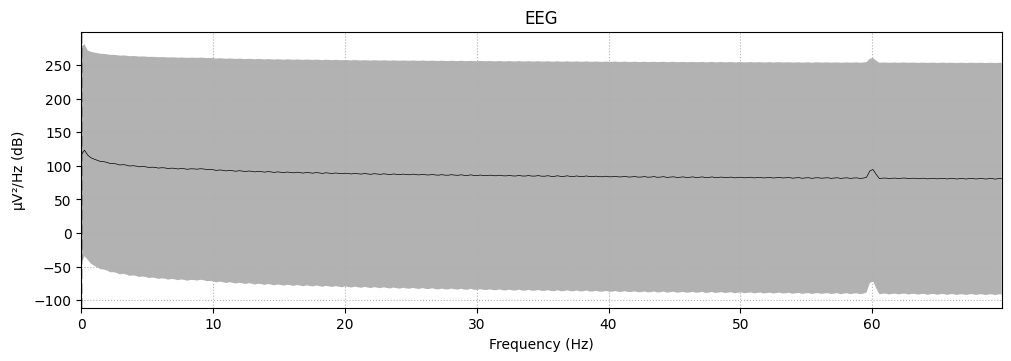

: 

In [ ]:
raw = all_ds.datasets[11].raw
fig = raw.compute_psd(fmax=70).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([10, 500])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)
x = raw_selection[1]
y = raw_selection[0].T
print(np.min(y),np.max(y))
# plt.plot(x, y)

In [ ]:
from numpy import multiply
sampling_rate = 250 # resample to follow the tutorial sampling rate
high_cut_hz = 30
# Factor to convert from V to uV
factor = 1e4
preprocessors = [
    Preprocessor(lambda data: multiply(data, factor)),  # Convert from V to uV
    Preprocessor('crop', tmin=10),  # crop first 10 seconds as begining of noise recording
    Preprocessor('resample', sfreq=sampling_rate),
    Preprocessor('notch_filter', freqs=(60, 120)),
    Preprocessor('filter', l_freq=None, h_freq=high_cut_hz, n_jobs=n_jobs)
]

# Transform the data
preprocess(all_ds, preprocessors)
# all_ds.save('data/hbn_preprocessed')

/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


NameError: name 'n_jobs' is not defined

In [6]:
loaded_dataset = load_concat_dataset(path='data/hbn_preprocessed', preload=False)
all_ds = loaded_dataset

Opening raw data file data/hbn_preprocessed/0/0-raw.fif...
    Range : 2500 ... 87928 =     10.000 ...   351.712 secs
Ready.
Opening raw data file data/hbn_preprocessed/1/1-raw.fif...
    Range : 2500 ... 144627 =     10.000 ...   578.508 secs
Ready.
Opening raw data file data/hbn_preprocessed/2/2-raw.fif...
    Range : 2500 ... 87715 =     10.000 ...   350.860 secs
Ready.
Opening raw data file data/hbn_preprocessed/3/3-raw.fif...
    Range : 2500 ... 94714 =     10.000 ...   378.856 secs
Ready.
Opening raw data file data/hbn_preprocessed/4/4-raw.fif...
    Range : 2500 ... 86753 =     10.000 ...   347.012 secs
Ready.
Opening raw data file data/hbn_preprocessed/5/5-raw.fif...
    Range : 2500 ... 87177 =     10.000 ...   348.708 secs
Ready.
Opening raw data file data/hbn_preprocessed/6/6-raw.fif...
    Range : 2500 ... 87816 =     10.000 ...   351.264 secs
Ready.
Opening raw data file data/hbn_preprocessed/7/7-raw.fif...
    Range : 2500 ... 92002 =     10.000 ...   368.008 secs
Ready.

Opening raw data file data/hbn_preprocessed/11/11-raw.fif...
    Range : 2500 ... 88053 =     10.000 ...   352.212 secs
Ready.
Opening raw data file data/hbn_preprocessed/12/12-raw.fif...
    Range : 2500 ... 97989 =     10.000 ...   391.956 secs
Ready.
Opening raw data file data/hbn_preprocessed/13/13-raw.fif...
    Range : 2500 ... 86752 =     10.000 ...   347.008 secs
Ready.
Opening raw data file data/hbn_preprocessed/14/14-raw.fif...
    Range : 2500 ... 94513 =     10.000 ...   378.052 secs
Ready.
Opening raw data file data/hbn_preprocessed/15/15-raw.fif...
    Range : 2500 ... 106914 =     10.000 ...   427.656 secs
Ready.
Opening raw data file data/hbn_preprocessed/16/16-raw.fif...
    Range : 2500 ... 107476 =     10.000 ...   429.904 secs
Ready.
Opening raw data file data/hbn_preprocessed/17/17-raw.fif...
    Range : 2500 ... 182509 =     10.000 ...   730.036 secs
Ready.
Opening raw data file data/hbn_preprocessed/18/18-raw.fif...
    Range : 2500 ... 102038 =     10.000 ...   

In [7]:
all_ds.datasets[0].description

task             RestingState
session                      
run                          
subject          NDARRD326KB9
sfreq                     500
age                   13.0092
sex                         F
ehq_total               57.83
p_factor               -0.648
attention              -0.055
internalizing          -0.051
externalizing          -0.109
dtype: object

(array([[37.09259991, 37.09679191, 37.09481991, ..., 36.60017591,
        36.65189191, 36.71610791]]), array([10.   , 10.004, 10.008, ..., 99.988, 99.992, 99.996]))
35.91583190932124 41.60955589494597


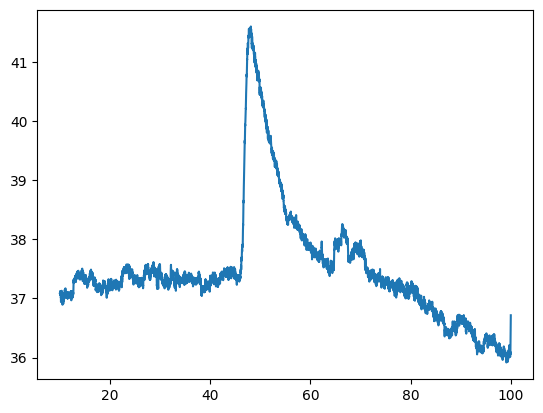

In [8]:
raw = all_ds.datasets[11].raw
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([10, 100])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)
x = raw_selection[1]
y = raw_selection[0].T
print(np.min(y),np.max(y))
plt.plot(x, y)
plt.show()

In [9]:
window_len_s = 2
fs = all_ds.datasets[0].raw.info['sfreq']
print('sampling rate', fs)
window_len_samples = int(fs * window_len_s)
window_stride_samples = int(fs * window_len_s) # non-overlapping
windows_ds = create_fixed_length_windows(
    all_ds, start_offset_samples=0, stop_offset_samples=None,
    window_size_samples=window_len_samples,
    window_stride_samples=window_stride_samples, drop_last_window=True,
    preload=False)

sampling rate 250.0


In [10]:
from sklearn.preprocessing import scale as standard_scale

preprocess(windows_ds, [Preprocessor(standard_scale, channel_wise=True)])

Reading 0 ... 85428  =      0.000 ...   341.712 secs...


Reading 0 ... 142127  =      0.000 ...   568.508 secs...
Reading 0 ... 85215  =      0.000 ...   340.860 secs...
Reading 0 ... 92214  =      0.000 ...   368.856 secs...
Reading 0 ... 84253  =      0.000 ...   337.012 secs...
Reading 0 ... 84677  =      0.000 ...   338.708 secs...
Reading 0 ... 85316  =      0.000 ...   341.264 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 89502  =      0.000 ...   358.008 secs...
Reading 0 ... 84815  =      0.000 ...   339.260 secs...
Reading 0 ... 89528  =      0.000 ...   358.112 secs...
Reading 0 ... 113237  =      0.000 ...   452.948 secs...
Reading 0 ... 85553  =      0.000 ...   342.212 secs...
Reading 0 ... 95489  =      0.000 ...   381.956 secs...
Reading 0 ... 84252  =      0.000 ...   337.008 secs...
Reading 0 ... 92013  =      0.000 ...   368.052 secs...
Reading 0 ... 104414  =      0.000 ...   417.656 secs...
Reading 0 ... 104976  =      0.000 ...   419.904 secs...
Reading 0 ... 180009  =      0.000 ...   720.036 secs...
Reading 0 ... 99538  =      0.000 ...   398.152 secs...
Reading 0 ... 103013  =      0.000 ...   412.052 secs...
Reading 0 ... 119212  =      0.000 ...   476.848 secs...
Reading 0 ... 98651  =      0.000 ...   394.604 secs...
Reading 0 ... 84115  =      0.000 ...   336.460 secs...
Reading 0 ... 161815  =      0.000 ...   647.260 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard devia

Reading 0 ... 94253  =      0.000 ...   377.012 secs...
Reading 0 ... 95901  =      0.000 ...   383.604 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The

Reading 0 ... 87753  =      0.000 ...   351.012 secs...
Reading 0 ... 85865  =      0.000 ...   343.460 secs...
Reading 0 ... 83728  =      0.000 ...   334.912 secs...
Reading 0 ... 96215  =      0.000 ...   384.860 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 90391  =      0.000 ...   361.564 secs...
Reading 0 ... 138207  =      0.000 ...   552.828 secs...
Reading 0 ... 120677  =      0.000 ...   482.708 secs...
Reading 0 ... 84153  =      0.000 ...   336.612 secs...
Reading 0 ... 84429  =      0.000 ...   337.716 secs...
Reading 0 ... 122326  =      0.000 ...   489.304 secs...
Reading 0 ... 89438  =      0.000 ...   357.752 secs...
Reading 0 ... 87025  =      0.000 ...   348.100 secs...
Reading 0 ... 86028  =      0.000 ...   344.112 secs...
Reading 0 ... 88175  =      0.000 ...   352.700 secs...
Reading 0 ... 150840  =      0.000 ...   603.360 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 108151  =      0.000 ...   432.604 secs...
Reading 0 ... 84053  =      0.000 ...   336.212 secs...
Reading 0 ... 88104  =      0.000 ...   352.416 secs...
Reading 0 ... 92913  =      0.000 ...   371.652 secs...
Reading 0 ... 86077  =      0.000 ...   344.308 secs...
Reading 0 ... 83741  =      0.000 ...   334.964 secs...
Reading 0 ... 93401  =      0.000 ...   373.604 secs...
Reading 0 ... 95591  =      0.000 ...   382.364 secs...
Reading 0 ... 84017  =      0.000 ...   336.068 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 86390  =      0.000 ...   345.560 secs...
Reading 0 ... 98367  =      0.000 ...   393.468 secs...
Reading 0 ... 91889  =      0.000 ...   367.556 secs...
Reading 0 ... 140357  =      0.000 ...   561.428 secs...
Reading 0 ... 85177  =      0.000 ...   340.708 secs...
Reading 0 ... 240231  =      0.000 ...   960.924 secs...
Reading 0 ... 104539  =      0.000 ...   418.156 secs...
Reading 0 ... 92177  =      0.000 ...   368.708 secs...
Reading 0 ... 136001  =      0.000 ...   544.004 secs...
Reading 0 ... 95488  =      0.000 ...   381.952 secs...
Reading 0 ... 83903  =      0.000 ...   335.612 secs...
Reading 0 ... 100213  =      0.000 ...   400.852 secs...
Reading 0 ... 108315  =      0.000 ...   433.260 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 84215  =      0.000 ...   336.860 secs...
Reading 0 ... 89928  =      0.000 ...   359.712 secs...
Reading 0 ... 84691  =      0.000 ...   338.764 secs...
Reading 0 ... 87465  =      0.000 ...   349.860 secs...
Reading 0 ... 92725  =      0.000 ...   370.900 secs...
Reading 0 ... 150427  =      0.000 ...   601.708 secs...
Reading 0 ... 96689  =      0.000 ...   386.756 secs...
Reading 0 ... 94524  =      0.000 ...   378.096 secs...
Reading 0 ... 85129  =      0.000 ...   340.516 secs...
Reading 0 ... 84317  =      0.000 ...   337.268 secs...
Reading 0 ... 84929  =      0.000 ...   339.716 secs...
Reading 0 ... 84178  =      0.000 ...   336.712 secs...
Reading 0 ... 249285  =      0.000 ...   997.140 secs...
Reading 0 ... 210085  =      0.000 ...   840.340 secs...
Reading 0 ... 83403  =      0.000 ...   333.612 secs...
Reading 0 ... 86204  =      0.000 ...   344.816 secs...
Reading 0 ... 90801  =      0.000 ...   363.204 secs...
Reading 0 ... 103939  =      0.000 ...   415.

/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 97989  =      0.000 ...   391.956 secs...
Reading 0 ... 93877  =      0.000 ...   375.508 secs...
Reading 0 ... 136526  =      0.000 ...   546.104 secs...
Reading 0 ... 100950  =      0.000 ...   403.800 secs...
Reading 0 ... 99439  =      0.000 ...   397.756 secs...
Reading 0 ... 89152  =      0.000 ...   356.608 secs...
Reading 0 ... 88615  =      0.000 ...   354.460 secs...
Reading 0 ... 113838  =      0.000 ...   455.352 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 126536  =      0.000 ...   506.144 secs...
Reading 0 ... 84029  =      0.000 ...   336.116 secs...
Reading 0 ... 84627  =      0.000 ...   338.508 secs...
Reading 0 ... 131284  =      0.000 ...   525.136 secs...
Reading 0 ... 83855  =      0.000 ...   335.420 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 123601  =      0.000 ...   494.404 secs...
Reading 0 ... 85228  =      0.000 ...   340.912 secs...
Reading 0 ... 173603  =      0.000 ...   694.412 secs...
Reading 0 ... 117007  =      0.000 ...   468.028 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Reading 0 ... 97838  =      0.000 ...   391.352 secs...
Reading 0 ... 85353  =      0.000 ...   341.412 secs...
Reading 0 ... 97025  =      0.000 ...   388.100 secs...
Reading 0 ... 145262  =      0.000 ...   581.048 secs...
Reading 0 ... 100189  =      0.000 ...   400.756 secs...
Reading 0 ... 89889  =      0.000 ...   359.556 secs...
Reading 0 ... 108802  =      0.000 ...   435.208 secs...
Reading 0 ... 99763  =      0.000 ...   399.052 secs...
Reading 0 ... 95763  =      0.000 ...   383.052 secs...
Reading 0 ... 129799  =      0.000 ...   519.196 secs...
Reading 0 ... 83677  =      0.000 ...   334.708 secs...
Reading 0 ... 95001  =      0.000 ...   380.004 secs...
Reading 0 ... 83316  =      0.000 ...   333.264 secs...
Reading 0 ... 146005  =      0.000 ...   584.020 secs...
Reading 0 ... 88040  =      0.000 ...   352.160 secs...
Reading 0 ... 86366  =      0.000 ...   345.464 secs...
Reading 0 ... 87803  =      0.000 ...   351.212 secs...
Reading 0 ... 85378  =      0.000 ...   341

/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard devia

Reading 0 ... 249103  =      0.000 ...   996.412 secs...
Reading 0 ... 84791  =      0.000 ...   339.164 secs...
Reading 0 ... 94513  =      0.000 ...   378.052 secs...
Reading 0 ... 84666  =      0.000 ...   338.664 secs...
Reading 0 ... 93275  =      0.000 ...   373.100 secs...
Reading 0 ... 100751  =      0.000 ...   403.004 secs...
Reading 0 ... 84090  =      0.000 ...   336.360 secs...
Reading 0 ... 106251  =      0.000 ...   425.004 secs...
Reading 0 ... 85565  =      0.000 ...   342.260 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 92001  =      0.000 ...   368.004 secs...
Reading 0 ... 92865  =      0.000 ...   371.460 secs...
Reading 0 ... 87615  =      0.000 ...   350.460 secs...
Reading 0 ... 100026  =      0.000 ...   400.104 secs...
Reading 0 ... 102477  =      0.000 ...   409.908 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 175955  =      0.000 ...   703.820 secs...
Reading 0 ... 84279  =      0.000 ...   337.116 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Reading 0 ... 87991  =      0.000 ...   351.964 secs...
Reading 0 ... 85451  =      0.000 ...   341.804 secs...
Reading 0 ... 86101  =      0.000 ...   344.404 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 87080  =      0.000 ...   348.320 secs...
Reading 0 ... 113128  =      0.000 ...   452.512 secs...
Reading 0 ... 90775  =      0.000 ...   363.100 secs...
Reading 0 ... 115401  =      0.000 ...   461.604 secs...
Reading 0 ... 85651  =      0.000 ...   342.604 secs...
Reading 0 ... 86243  =      0.000 ...   344.972 secs...
Reading 0 ... 87076  =      0.000 ...   348.304 secs...
Reading 0 ... 86126  =      0.000 ...   344.504 secs...
Reading 0 ... 86863  =      0.000 ...   347.452 secs...
Reading 0 ... 117301  =      0.000 ...   469.204 secs...
Reading 0 ... 106966  =      0.000 ...   427.864 secs...
Reading 0 ... 114489  =      0.000 ...   457.956 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 85305  =      0.000 ...   341.220 secs...
Reading 0 ... 114463  =      0.000 ...   457.852 secs...
Reading 0 ... 102451  =      0.000 ...   409.804 secs...
Reading 0 ... 87137  =      0.000 ...   348.548 secs...
Reading 0 ... 98451  =      0.000 ...   393.804 secs...
Reading 0 ... 96451  =      0.000 ...   385.804 secs...
Reading 0 ... 89439  =      0.000 ...   357.756 secs...
Reading 0 ... 100539  =      0.000 ...   402.156 secs...
Reading 0 ... 97091  =      0.000 ...   388.364 secs...
Reading 0 ... 97226  =      0.000 ...   388.904 secs...
Reading 0 ... 88266  =      0.000 ...   353.064 secs...
Reading 0 ... 84278  =      0.000 ...   337.112 secs...
Reading 0 ... 105953  =      0.000 ...   423.812 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard devia

Reading 0 ... 108537  =      0.000 ...   434.148 secs...
Reading 0 ... 128803  =      0.000 ...   515.212 secs...
Reading 0 ... 83467  =      0.000 ...   333.868 secs...
Reading 0 ... 92276  =      0.000 ...   369.104 secs...
Reading 0 ... 83980  =      0.000 ...   335.920 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 123831  =      0.000 ...   495.324 secs...
Reading 0 ... 88013  =      0.000 ...   352.052 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 86662  =      0.000 ...   346.648 secs...
Reading 0 ... 87651  =      0.000 ...   350.604 secs...
Reading 0 ... 95451  =      0.000 ...   381.804 secs...
Reading 0 ... 87388  =      0.000 ...   349.552 secs...
Reading 0 ... 86192  =      0.000 ...   344.768 secs...
Reading 0 ... 86439  =      0.000 ...   345.756 secs...
Reading 0 ... 85812  =      0.000 ...   343.248 secs...
Reading 0 ... 90150  =      0.000 ...   360.600 secs...
Reading 0 ... 87163  =      0.000 ...   348.652 secs...
Reading 0 ... 82967  =      0.000 ...   331.868 secs...
Reading 0 ... 87489  =      0.000 ...   349.956 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 87451  =      0.000 ...   349.804 secs...
Reading 0 ... 91363  =      0.000 ...   365.452 secs...
Reading 0 ... 87626  =      0.000 ...   350.504 secs...
Reading 0 ... 112615  =      0.000 ...   450.460 secs...
Reading 0 ... 100089  =      0.000 ...   400.356 secs...
Reading 0 ... 85617  =      0.000 ...   342.468 secs...
Reading 0 ... 107051  =      0.000 ...   428.204 secs...
Reading 0 ... 85938  =      0.000 ...   343.752 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 87029  =      0.000 ...   348.116 secs...
Reading 0 ... 84530  =      0.000 ...   338.120 secs...
Reading 0 ... 91975  =      0.000 ...   367.900 secs...
Reading 0 ... 96013  =      0.000 ...   384.052 secs...
Reading 0 ... 84430  =      0.000 ...   337.720 secs...
Reading 0 ... 113477  =      0.000 ...   453.908 secs...
Reading 0 ... 158883  =      0.000 ...   635.532 secs...
Reading 0 ... 103026  =      0.000 ...   412.104 secs...
Reading 0 ... 112026  =      0.000 ...   448.104 secs...
Reading 0 ... 87163  =      0.000 ...   348.652 secs...
Reading 0 ... 84843  =      0.000 ...   339.372 secs...
Reading 0 ... 88863  =      0.000 ...   355.452 secs...
Reading 0 ... 118239  =      0.000 ...   472.956 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 88087  =      0.000 ...   352.348 secs...
Reading 0 ... 86213  =      0.000 ...   344.852 secs...
Reading 0 ... 134827  =      0.000 ...   539.308 secs...
Reading 0 ... 111701  =      0.000 ...   446.804 secs...
Reading 0 ... 85450  =      0.000 ...   341.800 secs...
Reading 0 ... 85438  =      0.000 ...   341.752 secs...
Reading 0 ... 84541  =      0.000 ...   338.164 secs...
Reading 0 ... 100951  =      0.000 ...   403.804 secs...
Reading 0 ... 85693  =      0.000 ...   342.772 secs...
Reading 0 ... 85303  =      0.000 ...   341.212 secs...
Reading 0 ... 105254  =      0.000 ...   421.016 secs...
Reading 0 ... 83555  =      0.000 ...   334.220 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard devia

Reading 0 ... 89525  =      0.000 ...   358.100 secs...
Reading 0 ... 85150  =      0.000 ...   340.600 secs...
Reading 0 ... 95530  =      0.000 ...   382.120 secs...
Reading 0 ... 83079  =      0.000 ...   332.316 secs...
Reading 0 ... 84231  =      0.000 ...   336.924 secs...
Reading 0 ... 91239  =      0.000 ...   364.956 secs...
Reading 0 ... 98059  =      0.000 ...   392.236 secs...
Reading 0 ... 88188  =      0.000 ...   352.752 secs...
Reading 0 ... 87291  =      0.000 ...   349.164 secs...
Reading 0 ... 95679  =      0.000 ...   382.716 secs...
Reading 0 ... 85588  =      0.000 ...   342.352 secs...
Reading 0 ... 103351  =      0.000 ...   413.404 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard devia

Reading 0 ... 88363  =      0.000 ...   353.452 secs...
Reading 0 ... 211283  =      0.000 ...   845.132 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 88625  =      0.000 ...   354.500 secs...
Reading 0 ... 89939  =      0.000 ...   359.756 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Reading 0 ... 105427  =      0.000 ...   421.708 secs...
Reading 0 ... 154461  =      0.000 ...   617.844 secs...
Reading 0 ... 98101  =      0.000 ...   392.404 secs...
Reading 0 ... 141226  =      0.000 ...   564.904 secs...
Reading 0 ... 85550  =      0.000 ...   342.200 secs...
Reading 0 ... 101138  =      0.000 ...   404.552 secs...
Reading 0 ... 89417  =      0.000 ...   357.668 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 83693  =      0.000 ...   334.772 secs...
Reading 0 ... 83719  =      0.000 ...   334.876 secs...
Reading 0 ... 84304  =      0.000 ...   337.216 secs...
Reading 0 ... 84505  =      0.000 ...   338.020 secs...
Reading 0 ... 84355  =      0.000 ...   337.420 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 83193  =      0.000 ...   332.772 secs...
Reading 0 ... 100251  =      0.000 ...   401.004 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 94675  =      0.000 ...   378.700 secs...
Reading 0 ... 83642  =      0.000 ...   334.568 secs...
Reading 0 ... 139623  =      0.000 ...   558.492 secs...
Reading 0 ... 88063  =      0.000 ...   352.252 secs...
Reading 0 ... 85688  =      0.000 ...   342.752 secs...
Reading 0 ... 84226  =      0.000 ...   336.904 secs...
Reading 0 ... 85389  =      0.000 ...   341.556 secs...
Reading 0 ... 94167  =      0.000 ...   376.668 secs...
Reading 0 ... 94113  =      0.000 ...   376.452 secs...
Reading 0 ... 86113  =      0.000 ...   344.452 secs...
Reading 0 ... 108176  =      0.000 ...   432.704 secs...
Reading 0 ... 82755  =      0.000 ...   331.020 secs...
Reading 0 ... 90976  =      0.000 ...   363.904 secs...
Reading 0 ... 83817  =      0.000 ...   335.268 secs...
Reading 0 ... 84105  =      0.000 ...   336.420 secs...
Reading 0 ... 82867  =      0.000 ...   331.468 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard devia

Reading 0 ... 109551  =      0.000 ...   438.204 secs...
Reading 0 ... 103977  =      0.000 ...   415.908 secs...
Reading 0 ... 105901  =      0.000 ...   423.604 secs...
Reading 0 ... 102775  =      0.000 ...   411.100 secs...
Reading 0 ... 84642  =      0.000 ...   338.568 secs...
Reading 0 ... 85975  =      0.000 ...   343.900 secs...
Reading 0 ... 84593  =      0.000 ...   338.372 secs...
Reading 0 ... 100551  =      0.000 ...   402.204 secs...
Reading 0 ... 104113  =      0.000 ...   416.452 secs...


/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Reading 0 ... 85956  =      0.000 ...   343.824 secs...
Reading 0 ... 90738  =      0.000 ...   362.952 secs...


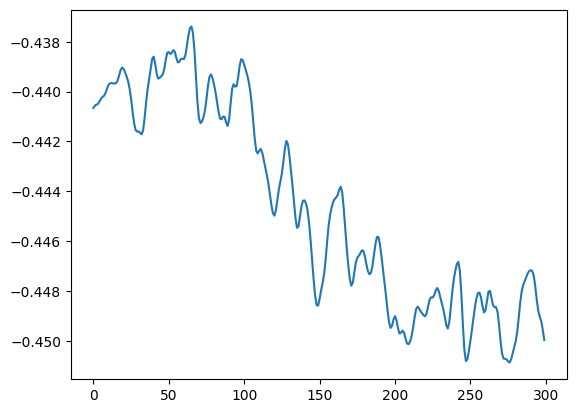

In [11]:
sample_range = list(range(300))
plt.plot(sample_range, windows_ds[100][0][0,sample_range])
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from braindecode.datasets import BaseConcatDataset

subjects = np.unique(windows_ds.description['subject'])
subj_train, subj_test = train_test_split(
    subjects, test_size=0.4, random_state=random_state)
subj_valid, subj_test = train_test_split(
    subj_test, test_size=0.5, random_state=random_state)

In [13]:
class RelativePositioningDataset(BaseConcatDataset):
    """BaseConcatDataset with __getitem__ that expects 2 indices and a target.
    """

    def __init__(self, list_of_ds):
        super().__init__(list_of_ds)
        self.return_pair = True

    def __getitem__(self, index):
        if self.return_pair:
            ind1, ind2, y = index
            return (super().__getitem__(ind1)[0],
                    super().__getitem__(ind2)[0]), y
        else:
            return super().__getitem__(index)

    @property
    def return_pair(self):
        return self._return_pair

    @return_pair.setter
    def return_pair(self, value):
        self._return_pair = value


split_ids = {'train': subj_train, 'valid': subj_valid, 'test': subj_test}
splitted = dict()
for name, values in split_ids.items():
    splitted[name] = RelativePositioningDataset(
        [ds for ds in windows_ds.datasets
         if ds.description['subject'] in values])


In [14]:
splitted['train'].get_metadata()

/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_dfs)


,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,task,session,run,subject,sfreq,age,sex,ehq_total,p_factor,attention,internalizing,externalizing
0,0,0,500,-1,RestingState,,,NDARZD415ZZ1,500,7.6979,M,93.38,-0.66,0.786,0.657,-0.398
1,1,500,1000,-1,RestingState,,,NDARZD415ZZ1,500,7.6979,M,93.38,-0.66,0.786,0.657,-0.398
2,2,1000,1500,-1,RestingState,,,NDARZD415ZZ1,500,7.6979,M,93.38,-0.66,0.786,0.657,-0.398
3,3,1500,2000,-1,RestingState,,,NDARZD415ZZ1,500,7.6979,M,93.38,-0.66,0.786,0.657,-0.398
4,4,2000,2500,-1,RestingState,,,NDARZD415ZZ1,500,7.6979,M,93.38,-0.66,0.786,0.657,-0.398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,83000,83500,-1,RestingState,,,NDARTH433TE0,500,5.4358,M,100.05,0.94,-0.637,-0.349,1.055
167,167,83500,84000,-1,RestingState,,,NDARTH433TE0,500,5.4358,M,100.05,0.94,-0.637,-0.349,1.055
168,168,84000,84500,-1,RestingState,,,NDARTH433TE0,500,5.4358,M,100.05,0.94,-0.637,-0.349,1.055
169,169,84500,85000,-1,RestingState,,,NDARTH433TE0,500,5.4358,M,100.05,0.94,-0.637,-0.349,1.055


In [15]:
from braindecode.samplers import RelativePositioningSampler

sfreq = 250
tau_pos, tau_neg = int(sfreq * 10), int(sfreq * 2 * 10)
n_examples_train = 250 * len(splitted['train'].datasets)
n_examples_valid = 250 * len(splitted['valid'].datasets)
n_examples_test = 250 * len(splitted['test'].datasets)

train_sampler = RelativePositioningSampler(
    splitted['train'].get_metadata(), tau_pos=tau_pos, tau_neg=tau_neg,
    n_examples=n_examples_train, same_rec_neg=True, random_state=random_state)
valid_sampler = RelativePositioningSampler(
    splitted['valid'].get_metadata(), tau_pos=tau_pos, tau_neg=tau_neg,
    n_examples=n_examples_valid, same_rec_neg=True,
    random_state=random_state).presample()
test_sampler = RelativePositioningSampler(
    splitted['test'].get_metadata(), tau_pos=tau_pos, tau_neg=tau_neg,
    n_examples=n_examples_test, same_rec_neg=True,
    random_state=random_state).presample()

/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_dfs)
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_dfs)
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is depre

In [18]:
import torch
from torch import nn
from braindecode.util import set_random_seeds
from braindecode.models import SleepStagerChambon2018

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.backends.cudnn.benchmark = False
# Set random seed to be able to roughly reproduce results
# Note that with cudnn benchmark set to True, GPU indeterminism
# may still make results substantially different between runs.
# To obtain more consistent results at the cost of increased computation time,
# you can set `cudnn_benchmark=False` in `set_random_seeds`
# or remove `torch.backends.cudnn.benchmark = True`
set_random_seeds(seed=random_state, cuda=device == 'cuda')

# Extract number of channels and time steps from dataset
n_channels, input_size_samples = windows_ds[0][0].shape
print(n_channels, input_size_samples)
emb_size = 100
classes = list(range(5))

emb = SleepStagerChambon2018(
    n_channels,
    sfreq,
    n_outputs=emb_size,
    n_conv_chs=16,
    n_times=input_size_samples,
    dropout=0,
    apply_batch_norm=True,
)


class ContrastiveNet(nn.Module):
    """Contrastive module with linear layer on top of siamese embedder.

    Parameters
    ----------
    emb : nn.Module
        Embedder architecture.
    emb_size : int
        Output size of the embedder.
    dropout : float
        Dropout rate applied to the linear layer of the contrastive module.
    """

    def __init__(self, emb, emb_size, dropout=0.5):
        super().__init__()
        self.emb = emb
        self.clf = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(emb_size, 1)
        )

    def forward(self, x):
        x1, x2 = x
        z1, z2 = self.emb(x1), self.emb(x2)
        return self.clf(torch.abs(z1 - z2)).flatten()


model = ContrastiveNet(emb, emb_size).to(device)

129 500


ValueError: n_times=500 different from input_window_seconds=30 * sfreq=250

In [17]:
import os

from skorch.helper import predefined_split
from skorch.callbacks import Checkpoint, EarlyStopping, EpochScoring
from braindecode import EEGClassifier

lr = 5e-3
batch_size = 12  # 512 if data large enough
n_epochs = 25
num_workers = 0 if n_jobs <= 1 else n_jobs

cp = Checkpoint(dirname='', f_criterion=None, f_optimizer=None, f_history=None)
early_stopping = EarlyStopping(patience=10)
train_acc = EpochScoring(
    scoring='accuracy', on_train=True, name='train_acc', lower_is_better=False)

callbacks = [
    ('cp', cp),
    ('patience', early_stopping),
    ('train_acc', train_acc),
]

clf = EEGClassifier(
    model,
    criterion=torch.nn.BCEWithLogitsLoss,
    optimizer=torch.optim.Adam,
    max_epochs=n_epochs,
    iterator_train__shuffle=False,
    iterator_train__sampler=train_sampler,
    iterator_valid__sampler=valid_sampler,
    iterator_train__num_workers=num_workers,
    iterator_valid__num_workers=num_workers,
    train_split=predefined_split(splitted['valid']),
    optimizer__lr=lr,
    batch_size=batch_size,
    callbacks=callbacks,
    device=device,
    classes=classes,
)
# Model training for a specified number of epochs. `y` is None as it is already
# supplied in the dataset.
clf.fit(splitted['train'], y=None)
clf.load_params(checkpoint=cp)  # Load the model with the lowest valid_loss

os.remove('./params.pt')  # Delete parameters file

NameError: name 'model' is not defined

# Torch Lightning

In [34]:
import lightning as L
import torch
from torch import nn
from braindecode.util import set_random_seeds
from braindecode.models import SleepStagerChambon2018
# Extract number of channels and time steps from dataset
n_channels, input_size_samples = windows_ds[0][0].shape
emb_size = 100
classes = list(range(5))

emb = SleepStagerChambon2018(
    n_channels,
    sfreq,
    n_outputs=emb_size,
    n_conv_chs=16,
    n_times=input_size_samples,
    dropout=0,
    apply_batch_norm=True,
)

# define the LightningModule
class LitSSL(L.LightningModule):
    def __init__(self, emb, emb_size, dropout=0.5):
        super().__init__()
        self.emb = emb
        self.clf = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(emb_size, 1)
        )

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        X, y = batch
        x1, x2 = X[0], X[1]
        z1, z2 = self.emb(x1), self.emb(x2)
        loss = nn.functional.binary_cross_entropy_with_logits(self.clf(torch.abs(z1 - z2)).flatten(), y)

        # Logging to TensorBoard (if installed) by default
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

model =  LitSSL(emb, emb_size)

In [35]:
train_loader = DataLoader(splitted['train'], sampler=train_sampler, batch_size=12, num_workers=4)
# train the model (hint: here are some helpful Trainer arguments for rapid idea iteration)
trainer = L.Trainer(limit_train_batches=100, max_epochs=10, accelerator='gpu')
trainer.fit(model=model, train_dataloaders=train_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type                   | Params | Mode 
--------------------------------------------------------
0 | emb  | SleepStagerChambon2018 | 704 K  | train
1 | clf  | Sequential             | 101    | train
--------------------------------------------------------
704 K     Trainable params
0         Non-trainable params
704 K     Total params
2.817     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Epoch 2:  81%|████████  | 81/100 [00:34<00:08,  2.33it/s, v_num=7] 


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined